<h1> Import Libraries </h1>

In [1]:
import numpy as np
import pandas as pd
import sqlite3

<h1> Step 1: Load CSV Data  </h1>

In [3]:
orders = pd.read_csv(r"C:\Users\Siddiqui\Desktop\Hackathon\orders.csv")
orders


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian
...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian


In [4]:
orders.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         10000 non-null  int64  
 1   user_id          10000 non-null  int64  
 2   restaurant_id    10000 non-null  int64  
 3   order_date       10000 non-null  object 
 4   total_amount     10000 non-null  float64
 5   restaurant_name  10000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 468.9+ KB


In [6]:
orders.describe()

,order_id,user_id,restaurant_id,total_amount
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1504.117700,251.016700,801.162412
std,2886.89568,861.727776,144.622558,405.458753
min,1.00000,1.000000,1.000000,100.200000
25%,2500.75000,761.000000,127.000000,446.310000
50%,5000.50000,1508.000000,251.000000,806.295000
75%,7500.25000,2250.250000,376.000000,1149.227500
max,10000.00000,3000.000000,500.000000,1499.830000


In [7]:
orders.isnull().sum()

order_id           0
user_id            0
restaurant_id      0
order_date         0
total_amount       0
restaurant_name    0
dtype: int64

<h1> Step 2: Load JSON Data </h1>

In [8]:
users = pd.read_json(r"C:\Users\Siddiqui\Desktop\Hackathon\users.json")
users

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold
...,...,...,...,...
2995,2996,User_2996,Hyderabad,Gold
2996,2997,User_2997,Hyderabad,Regular
2997,2998,User_2998,Bangalore,Regular
2998,2999,User_2999,Pune,Regular


In [9]:
users.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     3000 non-null   int64 
 1   name        3000 non-null   object
 2   city        3000 non-null   object
 3   membership  3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [11]:
users.describe()

,user_id
count,3000.000000
mean,1500.500000
std,866.169729
min,1.000000
25%,750.750000
50%,1500.500000
75%,2250.250000
max,3000.000000


In [12]:
users.isnull().sum()

user_id       0
name          0
city          0
membership    0
dtype: int64

<h1>Step 3: Load SQL Data</h1>

In [13]:
conn = sqlite3.connect(r"C:\Users\Siddiqui\Desktop\Hackathon\restaurants.db")

In [15]:
conn = sqlite3.connect("restaurants.db")
with open(r"C:\Users\Siddiqui\Desktop\Hackathon\restaurants.sql", "r") as f:
    sql_script = f.read()

conn.executescript(sql_script)


OperationalError: table restaurants already exists

In [16]:
restaurants = pd.read_sql("SELECT * FROM restaurants", conn)
restaurants

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8
...,...,...,...,...
495,496,Restaurant_496,Indian,3.1
496,497,Restaurant_497,Mexican,4.4
497,498,Restaurant_498,Chinese,3.9
498,499,Restaurant_499,Mexican,4.9


In [17]:
restaurants.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [18]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_id    500 non-null    int64  
 1   restaurant_name  500 non-null    object 
 2   cuisine          500 non-null    object 
 3   rating           500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [19]:
restaurants.describe()

,restaurant_id,rating
count,500.000000,500.000000
mean,250.500000,4.040600
std,144.481833,0.604469
min,1.000000,3.000000
25%,125.750000,3.500000
50%,250.500000,4.100000
75%,375.250000,4.600000
max,500.000000,5.000000


In [20]:
restaurants.isnull().sum()

restaurant_id      0
restaurant_name    0
cuisine            0
rating             0
dtype: int64

<h1>Step 4: Merge the Data</h1>

<h2>Merge Orders + Users

In [21]:
orders_users = pd.merge(
    orders,
    users,
    on="user_id",
    how="left"
)


<h2>Merge with Restaurants

In [22]:
final_df = pd.merge(
    orders_users,
    restaurants,
    on="restaurant_id",
    how="left"
)


<h3> Clean Column Names</h3>

In [23]:
final_df.rename(columns={
    'name': 'user_name',
    'restaurant_name_x': 'restaurant_name'
}, inplace=True)

# Drop duplicate restaurant name column
if 'restaurant_name_y' in final_df.columns:
    final_df.drop(columns=['restaurant_name_y'], inplace=True)


<h3>Final Dataset Check

In [24]:
print(final_df.shape)
print(final_df.columns)
print(final_df.head())


(10000, 11)
Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name', 'user_name', 'city', 'membership', 'cuisine',
       'rating'],
      dtype='object')
   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                  restaurant_name  user_name       city membership  cuisine  \
0               New Foods Chinese  User_2508  Hyderabad    Regular  Mexican   
1  Ruchi Curry House Multicuisine  User_2693       Pune    Regular   Indian   
2           Spice Kitchen Punjabi  User_2084    Chennai       Gold  Mexican   
3          Darbar Kitchen Non-Veg   User_319  Bangalore       Gold  Chinese   
4       Royal

<h1>Step 5: Create Final Dataset</h1>

In [25]:
final_df.to_csv(
    r"C:\Users\Siddiqui\Desktop\Hackathon\final_food_delivery_dataset.csv",
    index=False
)


<h1> Order Trends Over Time</h1>

In [26]:
final_df['order_date'] = pd.to_datetime(final_df['order_date'], dayfirst=True)

final_df.groupby(final_df['order_date'].dt.month)['order_id'].count()


order_date
1     831
2     785
3     903
4     812
5     844
6     784
7     859
8     851
9     812
10    863
11    807
12    849
Name: order_id, dtype: int64

<h1> User Behavior – Gold vs Regular

In [27]:
final_df.groupby('membership')['order_id'].count()
final_df.groupby('membership')['total_amount'].mean()


membership
Gold       797.145556
Regular    805.158434
Name: total_amount, dtype: float64

<h1>  City-wise Performance </h1>

In [28]:
final_df.groupby('city')['total_amount'].sum().sort_values(ascending=False)


city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: total_amount, dtype: float64

<h2> Cuisine-wise Performance

In [29]:
final_df.groupby('cuisine')['order_id'].count().sort_values(ascending=False)


cuisine
Mexican    2581
Italian    2532
Indian     2469
Chinese    2418
Name: order_id, dtype: int64

<h3>Revenue Distribution

In [30]:
final_df['total_amount'].describe()


count    10000.000000
mean       801.162412
std        405.458753
min        100.200000
25%        446.310000
50%        806.295000
75%       1149.227500
max       1499.830000
Name: total_amount, dtype: float64

Seasonality (Monthly Revenue)

In [31]:
final_df.groupby(final_df['order_date'].dt.month)['total_amount'].sum()


order_date
1     663020.26
2     630867.40
3     716738.98
4     666097.18
5     668428.61
6     610822.93
7     688559.45
8     694987.58
9     653838.07
10    699187.73
11    637772.43
12    681303.50
Name: total_amount, dtype: float64

<h1> CHARTS (Matplotlib 
    )</h1>

<h1> Monthly Order Trend

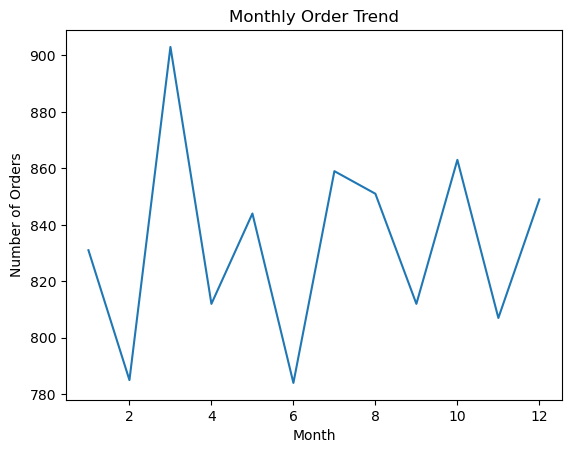

In [32]:
import matplotlib.pyplot as plt

monthly_orders = final_df.groupby(final_df['order_date'].dt.month)['order_id'].count()

plt.figure()
monthly_orders.plot()
plt.title("Monthly Order Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()


<h1>Revenue by Membership (Gold vs Regular)

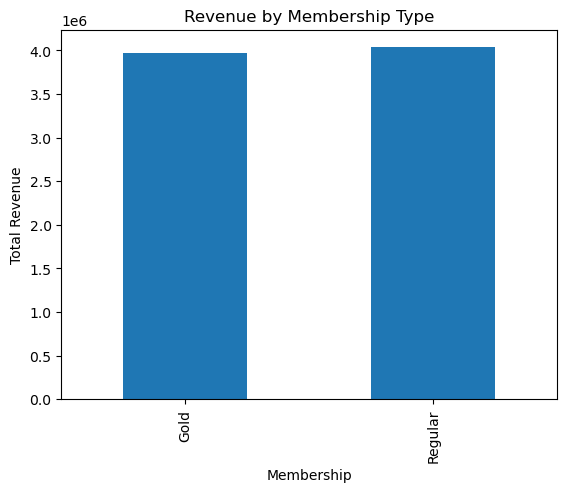

In [33]:
membership_revenue = final_df.groupby('membership')['total_amount'].sum()

plt.figure()
membership_revenue.plot(kind='bar')
plt.title("Revenue by Membership Type")
plt.xlabel("Membership")
plt.ylabel("Total Revenue")
plt.show()


<h1> City-wise Revenue (Top 5)</h1>

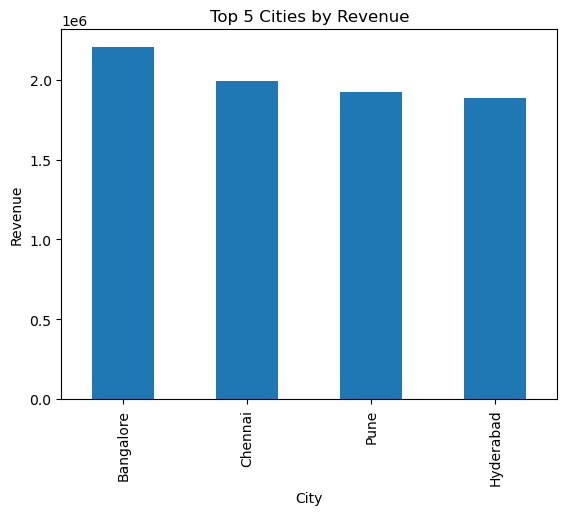

In [34]:
city_revenue = final_df.groupby('city')['total_amount'].sum().sort_values(ascending=False).head(5)

plt.figure()
city_revenue.plot(kind='bar')
plt.title("Top 5 Cities by Revenue")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.show()


In [35]:
final_df.isnull().sum()


order_id           0
user_id            0
restaurant_id      0
order_date         0
total_amount       0
restaurant_name    0
user_name          0
city               0
membership         0
cuisine            0
rating             0
dtype: int64

In [36]:
final_df.groupby('cuisine')['total_amount'].mean().sort_values(ascending=False)


cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64

In [37]:
cuisine_revenue = final_df.groupby('cuisine')['total_amount'].sum()
cuisine_revenue


cuisine
Chinese    1930504.65
Indian     1971412.58
Italian    2024203.80
Mexican    2085503.09
Name: total_amount, dtype: float64

In [38]:
options = [
    "Grand Cafe Punjabi",
    "Grand Restaurant South Indian",
    "Ruchi Mess Multicuisine",
    "Ruchi Foods Chinese"
]

final_df[final_df['restaurant_name'].isin(options)] \
    .groupby('restaurant_name') \
    .agg(total_orders=('order_id','count'),
         avg_order_value=('total_amount','mean')) \
    .sort_values('avg_order_value', ascending=False)


,total_orders,avg_order_value
restaurant_name,,
Ruchi Mess Multicuisine,40,851.226250
Grand Restaurant South Indian,29,842.567586
Grand Cafe Punjabi,32,765.409063
Ruchi Foods Chinese,19,686.603158


In [39]:
combo_revenue = (
    final_df
    .groupby(['membership', 'cuisine'])['total_amount']
    .sum()
    .sort_values(ascending=False)
)

combo_revenue


membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

In [40]:
gold_city_revenue = (
    final_df[final_df['membership'] == 'Gold']
    .groupby('city')['total_amount']
    .sum()
    .sort_values(ascending=False)
)

gold_city_revenue


city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64